<a href="https://colab.research.google.com/github/NidaNiazi/NidaNiazi/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [4]:
from google.colab import files
uploaded = files.upload() # Replace with your CSV file path
data = pd.read_csv('sales_data.csv')

Saving sales_data.csv to sales_data.csv


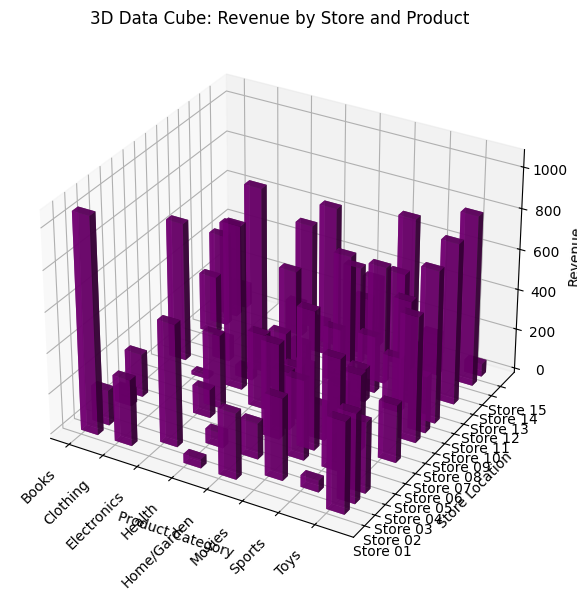

In [5]:
data['revenue'] = data['amount'] * data['single_price']

# Step 3: Aggregate revenue by store and product category
grouped_data = data.groupby(['store_id', 'product_category'])['revenue'].sum().reset_index()

# Step 4: Assign numerical indices to categories for plotting
grouped_data['store_idx'] = grouped_data['store_id'].astype('category').cat.codes
grouped_data['product_idx'] = grouped_data['product_category'].astype('category').cat.codes

# Step 5: Prepare data for 3D plotting
x = grouped_data['product_idx']  # Product categories
y = grouped_data['store_idx']    # Store locations
z = [0] * len(grouped_data)      # Base of the bars
dx = dy = 0.5                    # Width and depth of the bars
dz = grouped_data['revenue']     # Height of the bars

# Step 6: Create a 3D bar plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x, y, z, dx, dy, dz, color='purple', alpha=0.8)

# Step 7: Customize axis labels and ticks
ax.set_xticks(grouped_data['product_idx'].unique())
ax.set_xticklabels(grouped_data['product_category'].unique(), rotation=45, ha='right')
ax.set_yticks(grouped_data['store_idx'].unique())
ax.set_yticklabels(grouped_data['store_id'].unique())
ax.set_xlabel('Product Category')
ax.set_ylabel('Store Location')
ax.set_zlabel('Revenue')
ax.set_title('3D Data Cube: Revenue by Store and Product')

# Step 8: Show the plot
plt.show()


Saving sales_data.csv to sales_data (2).csv


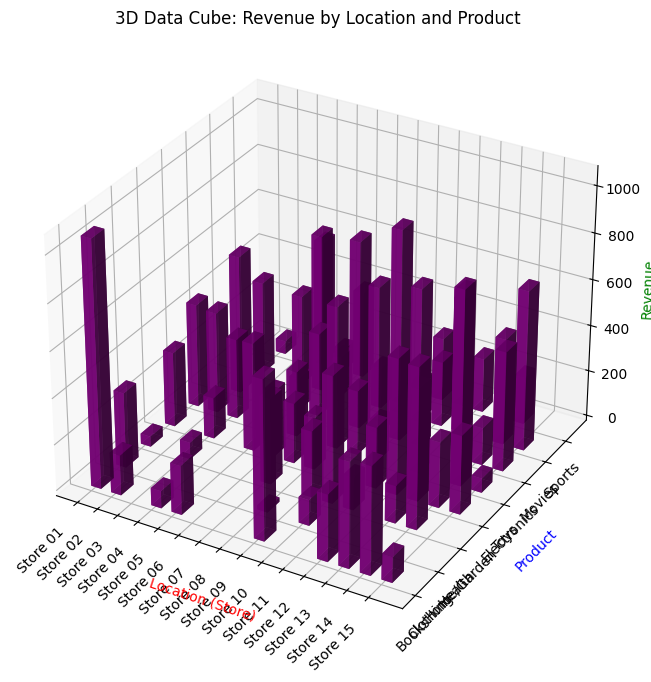

In [8]:
from google.colab import files
uploaded = files.upload() # Replace with your CSV file path
sales_data = pd.read_csv('sales_data.csv')
# Step 2: Calculate revenue
sales_data['revenue'] = sales_data['amount'] * sales_data['single_price']

# Step 3: Aggregate data for the 3D cube
cube_data = sales_data.groupby(['store_id', 'product_category'])['revenue'].sum().reset_index()

# Step 4: Map unique store IDs and product categories to numeric values for plotting
store_mapping = {store: i for i, store in enumerate(cube_data['store_id'].unique())}
product_mapping = {product: i for i, product in enumerate(cube_data['product_category'].unique())}

cube_data['store_idx'] = cube_data['store_id'].map(store_mapping)
cube_data['product_idx'] = cube_data['product_category'].map(product_mapping)

# Step 5: Prepare data for plotting
x = cube_data['store_idx']
y = cube_data['product_idx']
z = [0] * len(cube_data)  # Base z-axis (all bars start from zero)
dx = dy = 0.5  # Cube width and depth
dz = cube_data['revenue']  # Cube height (revenue)

# Step 6: Create the 3D bar plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D bars
ax.bar3d(x, y, z, dx, dy, dz, color='purple', alpha=0.8)

# Customize axis labels and ticks
ax.set_xticks(list(store_mapping.values()))
ax.set_xticklabels(list(store_mapping.keys()), rotation=45, ha='right')
ax.set_yticks(list(product_mapping.values()))
ax.set_yticklabels(list(product_mapping.keys()), rotation=45, ha='right')

ax.set_xlabel('Location (Store)')
ax.set_ylabel('Product')
ax.set_zlabel('Revenue')
ax.set_title('3D Data Cube: Revenue by Location and Product')

# Add axis colors for better aesthetics
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('blue')
ax.zaxis.label.set_color('green')

plt.show()

Saving sales_data.csv to sales_data (3).csv


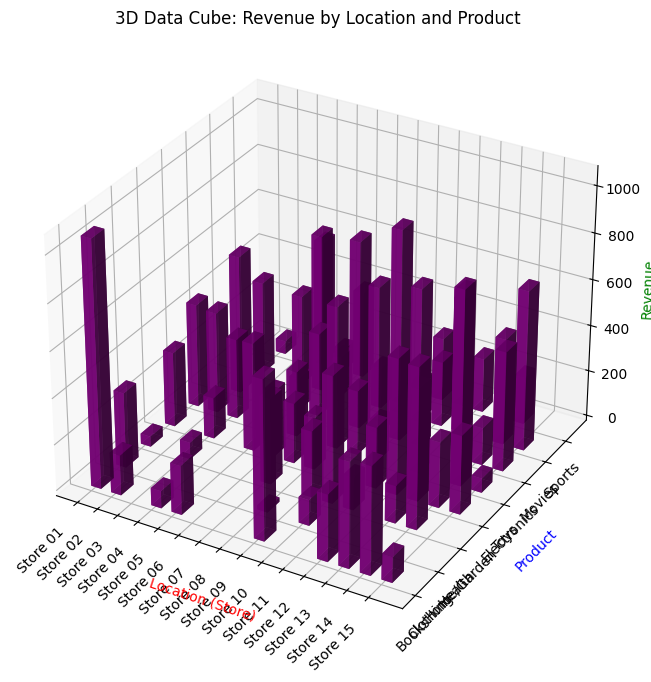

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from google.colab import files
uploaded = files.upload() # Replace with your CSV file path
sales_data = pd.read_csv('sales_data.csv')

# Step 1: Load the dataset

# Step 2: Calculate revenue
sales_data['revenue'] = sales_data['amount'] * sales_data['single_price']

# Step 3: Aggregate data for the 3D cube
cube_data = sales_data.groupby(['store_id', 'product_category'])['revenue'].sum().reset_index()

# Step 4: Map unique store IDs and product categories to numeric values for plotting
store_mapping = {store: i for i, store in enumerate(cube_data['store_id'].unique())}
product_mapping = {product: i for i, product in enumerate(cube_data['product_category'].unique())}

cube_data['store_idx'] = cube_data['store_id'].map(store_mapping)
cube_data['product_idx'] = cube_data['product_category'].map(product_mapping)

# Step 5: Prepare data for plotting
x = cube_data['store_idx']
y = cube_data['product_idx']
z = [0] * len(cube_data)  # Base z-axis (all bars start from zero)
dx = dy = 0.5  # Cube width and depth
dz = cube_data['revenue']  # Cube height (revenue)

# Step 6: Create the 3D bar plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D bars
ax.bar3d(x, y, z, dx, dy, dz, color='purple', alpha=0.8)

# Customize axis labels and ticks
ax.set_xticks(list(store_mapping.values()))
ax.set_xticklabels(list(store_mapping.keys()), rotation=45, ha='right')
ax.set_yticks(list(product_mapping.values()))
ax.set_yticklabels(list(product_mapping.keys()), rotation=45, ha='right')

ax.set_xlabel('Location (Store)')
ax.set_ylabel('Product')
ax.set_zlabel('Revenue')
ax.set_title('3D Data Cube: Revenue by Location and Product')

# Add axis colors for better aesthetics
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('blue')
ax.zaxis.label.set_color('green')

plt.show()


Saving sales_data.csv to sales_data (4).csv


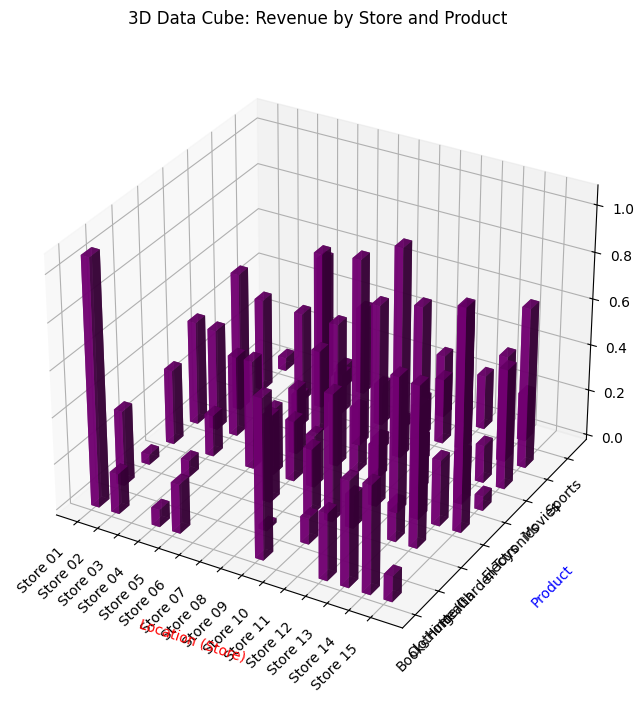

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from google.colab import files
uploaded = files.upload() # Replace with your CSV file path
sales_data = pd.read_csv('sales_data.csv')



# Step 2: Calculate revenue
sales_data['revenue'] = sales_data['amount'] * sales_data['single_price']

# Step 3: Aggregate revenue by store and product
cube_data = sales_data.groupby(['store_id', 'product_category'])['revenue'].sum().reset_index()

# Step 4: Map unique store IDs and product categories to numeric indices
store_mapping = {store: i for i, store in enumerate(cube_data['store_id'].unique())}
product_mapping = {product: i for i, product in enumerate(cube_data['product_category'].unique())}

cube_data['store_idx'] = cube_data['store_id'].map(store_mapping)
cube_data['product_idx'] = cube_data['product_category'].map(product_mapping)

# Step 5: Initialize 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Step 6: Plot individual cubes
for _, row in cube_data.iterrows():
    # Cube position (bottom-left corner)
    x = row['store_idx']
    y = row['product_idx']
    z = 0  # Base of each cube starts at z=0

    # Cube size (height corresponds to revenue)
    dx = dy = 0.4  # Width and depth of the cube
    dz = row['revenue'] / 1000  # Scale revenue for visualization

    # Plot the cube using a rectangular prism
    ax.bar3d(x, y, z, dx, dy, dz, color='purple', alpha=0.8)

# Step 7: Customize the axes
# Set ticks and labels for store locations
ax.set_xticks(list(store_mapping.values()))
ax.set_xticklabels(list(store_mapping.keys()), rotation=45, ha='right')
ax.set_xlabel('Location (Store)', labelpad=15, color='red')

# Set ticks and labels for product categories
ax.set_yticks(list(product_mapping.values()))
ax.set_yticklabels(list(product_mapping.keys()), rotation=45, ha='right')
ax.set_ylabel('Product', labelpad=15, color='blue')

# Set Z-axis for revenue
ax.set_zlabel('Revenue (in Thousands)', labelpad=10, color='green')

# Add a title
ax.set_title('3D Data Cube: Revenue by Store and Product', pad=20)

# Display the plot
plt.show()


<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  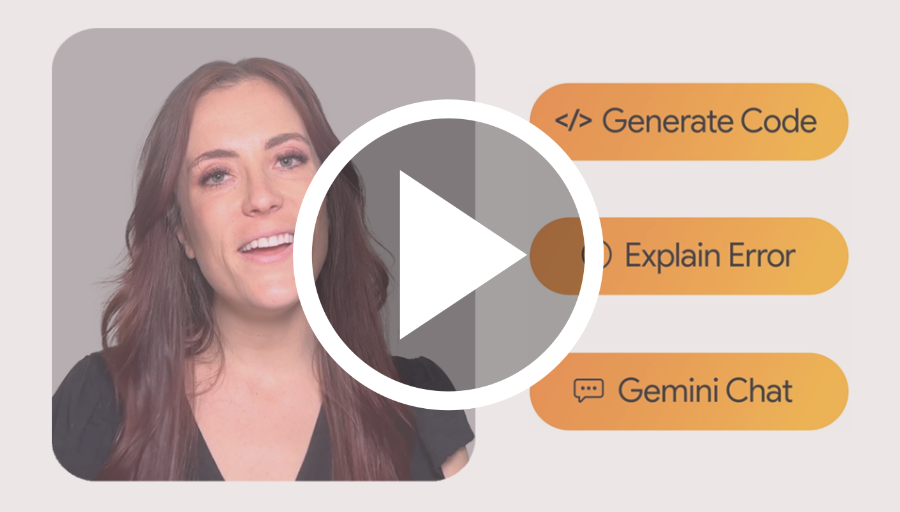
  </a>
</center>

Saving sales_data.csv to sales_data (5).csv


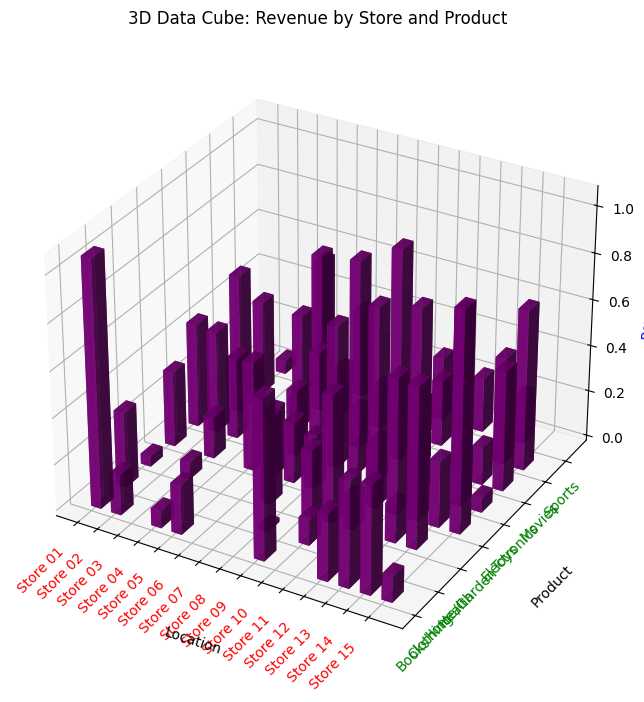

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from google.colab import files
uploaded = files.upload() # Replace with your CSV file path
sales_data = pd.read_csv('sales_data.csv')

# Step 2: Calculate revenue
sales_data['revenue'] = sales_data['amount'] * sales_data['single_price']

# Step 3: Aggregate revenue by store and product
aggregated_data = sales_data.groupby(['store_id', 'product_category'])['revenue'].sum().reset_index()

# Step 4: Assign unique numerical indices for store and product
store_mapping = {store: i for i, store in enumerate(aggregated_data['store_id'].unique())}
product_mapping = {product: i for i, product in enumerate(aggregated_data['product_category'].unique())}

aggregated_data['store_idx'] = aggregated_data['store_id'].map(store_mapping)
aggregated_data['product_idx'] = aggregated_data['product_category'].map(product_mapping)

# Step 5: Prepare the data for the 3D cube visualization
x_positions = aggregated_data['store_idx']
y_positions = aggregated_data['product_idx']
z_positions = np.zeros(len(aggregated_data))  # Base of the cubes
cube_sizes = aggregated_data['revenue'] / 1000  # Scale revenue to fit in the plot

# Step 6: Create the 3D Data Cube Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot cubes
for x, y, z, size in zip(x_positions, y_positions, z_positions, cube_sizes):
    # Each cube is represented as a bar3d element
    ax.bar3d(x, y, z, dx=0.5, dy=0.5, dz=size, color='purple', alpha=0.8)

# Step 7: Customize the plot to match the reference
# Set labels for store locations (X-axis)
ax.set_xticks(list(store_mapping.values()))
ax.set_xticklabels(list(store_mapping.keys()), rotation=45, ha='right', color='red')
ax.set_xlabel('Location', labelpad=15)

# Set labels for product categories (Y-axis)
ax.set_yticks(list(product_mapping.values()))
ax.set_yticklabels(list(product_mapping.keys()), rotation=45, ha='right', color='green')
ax.set_ylabel('Product', labelpad=15)

# Set the Z-axis for revenue
ax.set_zlabel('Revenue', color='blue')
ax.set_title('3D Data Cube: Revenue by Store and Product', pad=20)

# Show the plot
plt.show()


<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

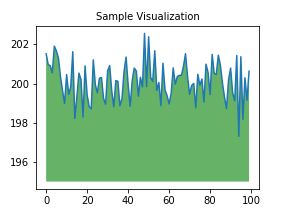

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
